# Análise Exploratória FILMES MovieLens

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import xlsxwriter

%matplotlib inline

In [158]:
notas = pd.read_csv('Dados/ratings.csv')
filmes = pd.read_csv('Dados/movies.csv')

In [159]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [160]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Renomenado as colunas

In [161]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [162]:
filmes.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [163]:
colunas_notas_pt = {
    'userId': 'usuarioId',
    'movieId': 'filmeId',
    'rating': 'nota',
    'timestamp': 'tempo'
}

colunas_filmes_pt = {
    'movieId': 'filmeId',
    'title': 'titulo',
    'genres': 'genero'
}

In [164]:
notas.rename(columns = colunas_notas_pt, inplace = True)
notas.columns

Index(['usuarioId', 'filmeId', 'nota', 'tempo'], dtype='object')

In [165]:
filmes.rename(columns = colunas_filmes_pt, inplace = True)
filmes.columns

Index(['filmeId', 'titulo', 'genero'], dtype='object')

### Descrevendo medidas estatísticas das notas

In [166]:
notas['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Vemos que a média (mean) das notas dadas aos filmes é de 3.50

### Observando onde as notas mais demonstram sua concentração e tendência

In [167]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

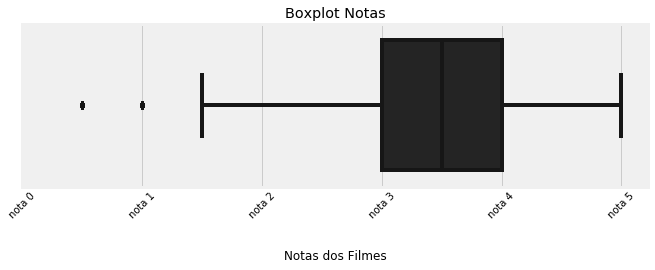

In [168]:
sns.set_palette('gist_gray')
plt.figure(figsize = (10, 3))

fig = sns.boxplot(notas['nota'])
fig.set_title('Boxplot Notas')
fig.set_xlabel('Notas dos Filmes', labelpad = 30)
fig.set_xticks(ticks = [0, 1, 2, 3, 4, 5])
fig.set_xticklabels(['nota 0', 'nota 1', 'nota 2', 'nota 3', 'nota 4', 'nota 5'], rotation = 45)
plt.savefig('jooj.png', dpi = 300, bbox_inches = 'tight')

#### Analisando a frequência das notas através de um histograma:

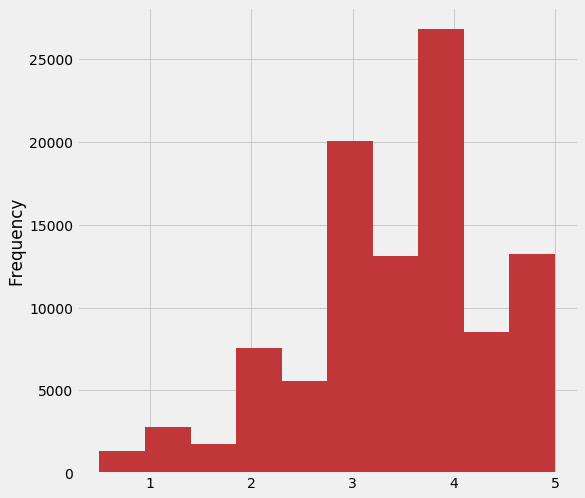

In [305]:
sns.set_palette('RdBu')
notas['nota'].plot(kind = 'hist')
plt.savefig('perera.png',  dpi = 300, bbox_inches = 'tight')

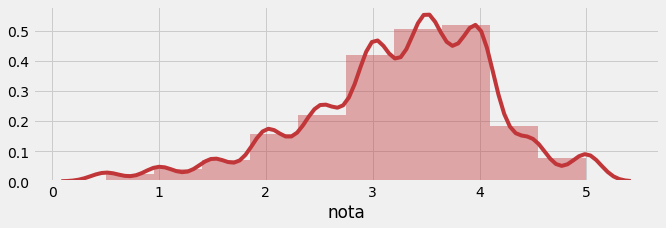

In [311]:
notas_por_filme = notas.groupby(by = ['filmeId']).mean()['nota']
plt.figure(figsize = (10, 3))
sns.distplot(notas_por_filme, bins = 10)

As notas mais frequêntes dentre os filmes etá entre 3 e 4

In [171]:
notas_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
6         3.946078
7         3.185185
8         2.875000
9         3.125000
10        3.496212
11        3.671429
12        2.421053
13        3.125000
14        3.833333
15        3.000000
16        3.926829
17        3.776119
18        3.700000
19        2.727273
20        2.500000
21        3.494382
22        3.222222
23        3.125000
24        3.125000
25        3.625000
26        3.500000
27        3.333333
28        4.227273
29        4.013158
30        3.000000
            ...   
188189    4.500000
188301    3.666667
188675    3.500000
188751    4.500000
188797    4.000000
188833    4.500000
189043    2.500000
189111    3.000000
189333    3.750000
189381    2.500000
189547    1.000000
189713    2.500000
190183    3.500000
190207    1.500000
190209    4.000000
190213    1.000000
190215    1.500000
190219    1.000000
190221    1.000000
191005    4.500000
193565    3.500000
1935

A nota com maior freqência na lista de filmes analisados é 4.0 com 26.818 vezes avaliada!

In [172]:
# aqui quero contar o total de vezes qe a nota 4 apareceu e saber a porcentagem em relação a amostra
notas[notas['nota'] == 4.0].count()

usuarioId    26818
filmeId      26818
nota         26818
tempo        26818
dtype: int64

In [173]:
# para isso é ecessário passar no final a chave ['nota']
nota_4 = notas[notas['nota'] == 4.0].count()['nota']
total_notas = notas['nota'].count()

In [174]:
porcentagem_nota_4 = round(nota_4 / total_notas, 2) * 100
porcentagem_nota_4

27.0

In [175]:
print('A nota com maior frequência na amostra (nota 4) representa {}% do total'.format(porcentagem_nota_4))

A nota com maior frequência na amostra (nota 4) representa 27.0% do total


#### Descobrindo as porcentagens das outras notas de forma rápida e dinâmica

Text(0.5, 1.0, 'Relação\n Porcentagem X Notas')

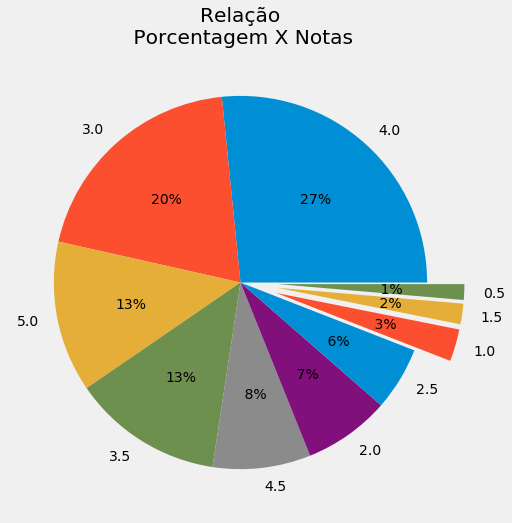

In [186]:
plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (8, 8))

plt.pie(notas['nota'].value_counts(), labels = notas['nota'].value_counts().index, autopct = '%2.f%%', explode = (0, 0, 0, 0, 0, 0, 0, .2, .2, .2))
plt.title('Relação\n Porcentagem X Notas')

In [177]:
filmes_e_notas = pd.merge(left = notas, right = filmes, how = 'inner')
filmes_e_notas

,usuarioId,filmeId,nota,tempo,titulo,genero
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [178]:
filmes_e_notas.query("titulo == 'Toy Story (1995)'")['nota'].mean()

3.9209302325581397

In [179]:
filmes_e_notas['genero'].value_counts()

Comedy                                               7196
Drama                                                6291
Comedy|Romance                                       3967
Comedy|Drama|Romance                                 3000
Comedy|Drama                                         2851
Drama|Romance                                        2838
Action|Adventure|Sci-Fi                              2361
Crime|Drama                                          2315
Action|Crime|Thriller                                1554
Action|Adventure|Thriller                            1455
Action|Adventure|Sci-Fi|Thriller                     1446
Drama|Thriller                                       1365
Action|Sci-Fi|Thriller                               1195
Comedy|Crime                                         1171
Crime|Drama|Thriller                                 1119
Drama|War                                            1044
Action|Drama|War                                     1034
Action|Crime|D

In [188]:
tmdb = pd.read_csv('Dados/tmdb_5000_movies.csv')
tmdb

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [371]:
tmdb[['original_title', 'vote_average']]

,original_title,vote_average
0,Avatar,7.2
1,Pirates of the Caribbean: At World's End,6.9
2,Spectre,6.3
3,The Dark Knight Rises,7.6
4,John Carter,6.1
5,Spider-Man 3,5.9
6,Tangled,7.4
7,Avengers: Age of Ultron,7.3
8,Harry Potter and the Half-Blood Prince,7.4
9,Batman v Superman: Dawn of Justice,5.7


In [198]:
original_language = tmdb['original_language'].value_counts().to_frame().reset_index()
original_language.rename(columns = {'index': 'língua', 'original_language': 'contagem'}, inplace = True)
original_language

,língua,contagem
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


Text(0.7, 70.2, 'jooj')

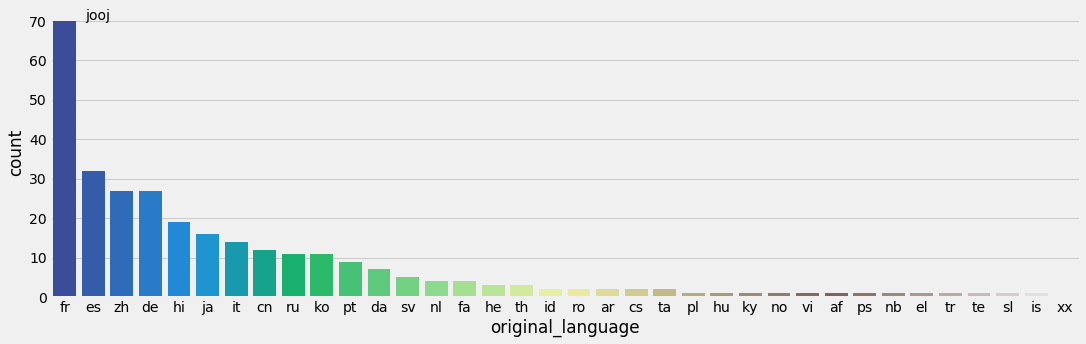

In [379]:
original_language_sem_ingles = tmdb.query("original_language != 'en'")

jooj = sns.catplot(x = 'original_language',
                kind = 'count',
                data = original_language_sem_ingles,
                order = original_language_sem_ingles['original_language'].value_counts().index,
                aspect = 3,
                palette = 'terrain')
plt.text(0.7, 70.2, 'jooj')

In [244]:
filmes_ingles = original_language[original_language['língua'] == 'en']['contagem'].sum()
filmes_outras_linguas = original_language[original_language['língua'] != 'en']['contagem'].sum()

In [253]:
contagem_lingua_filmes = pd.DataFrame(data = {
    'original_language': ['ingles', 'outras linguas'],
    'contagem': [filmes_ingles, filmes_outras_linguas],
})

In [254]:
contagem_lingua_filmes

,original_language,contagem
0,ingles,4505
1,outras linguas,298


Text(-1.8799999999999955, 0.5, 'Contagem')

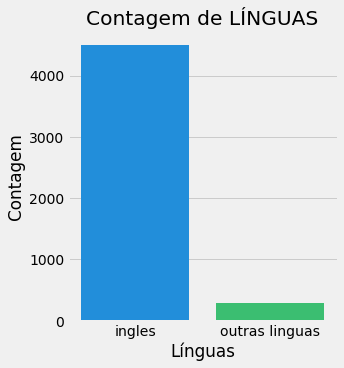

In [348]:
sns.set_palette('terrain')
jooj = sns.catplot(x = 'original_language' , y = 'contagem', kind = 'bar', data = contagem_lingua_filmes)
plt.title('Contagem de LÍNGUAS')
plt.xlabel('Línguas')
plt.ylabel('Contagem')

Colormap  is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r